## Assignment - 2 Data Science and Machine Learning in Canada
### INSTRUCTOR: Mohammed Saiful Islam
### Submitted by Group : Python Panthers
###                                           Akshay Vijaykumar (C0788183)
###                                           Dhaval Barot (C0778787)
###                                           Jibin John (C0796674)
###                                           Sweety Patel (C0789805)
                    

In [ ]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [3]:
# We have two datasets for adult dataset, train and test data
Train_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
Test_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'

train_data = pd.read_csv(Train_url,names =['age','workclass','fnlwgt','education','educationnum','maritalstatus','occupation','relationship','race','sex','capitalgain','capitalloss','hoursperweek','nativecountry','income'])
#the first row in test data is just an information, so we are skipping the first line
test_data = pd.read_csv(Test_url,skiprows = 1, names =['age','workclass','fnlwgt','education','educationnum','maritalstatus','occupation','relationship','race','sex','capitalgain','capitalloss','hoursperweek','nativecountry','income'])

In [4]:
train_data.shape

(32561, 15)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            32561 non-null  int64 
 1   workclass      32561 non-null  object
 2   fnlwgt         32561 non-null  int64 
 3   education      32561 non-null  object
 4   educationnum   32561 non-null  int64 
 5   maritalstatus  32561 non-null  object
 6   occupation     32561 non-null  object
 7   relationship   32561 non-null  object
 8   race           32561 non-null  object
 9   sex            32561 non-null  object
 10  capitalgain    32561 non-null  int64 
 11  capitalloss    32561 non-null  int64 
 12  hoursperweek   32561 non-null  int64 
 13  nativecountry  32561 non-null  object
 14  income         32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
#Checking how data looks like
train_data.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
train_data.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [8]:
train_data.isnull().sum()

age              0
workclass        0
fnlwgt           0
education        0
educationnum     0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
income           0
dtype: int64

In [9]:
#Checking for missing values 
train_data.isin([' ?']).sum(axis=0)

age                 0
workclass        1836
fnlwgt              0
education           0
educationnum        0
maritalstatus       0
occupation       1843
relationship        0
race                0
sex                 0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry     583
income              0
dtype: int64

 <=50K    24720
 >50K      7841
Name: income, dtype: int64


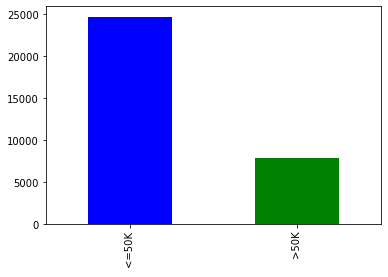

In [55]:
#Bias Check
print(train_data.income.value_counts())
train_data.income.value_counts().plot(kind="bar", color=["blue", "green"])

**We have missing values in three attributes, let's check first which all features will be needed for our models and accordingly handle the missing value**

In [10]:
#Dropping 'Education' attribute as we already have numerical attribute representing the same information
train_data = train_data.drop('education',axis =1)

In [11]:
#Using Label Encoder, we are labeling atttributes having words into its corresponding numerical values
from sklearn.preprocessing import LabelEncoder
labels = LabelEncoder()
feature = train_data.copy()
feature['workclass'] = feature[['workclass']].apply(labels.fit_transform)
feature['maritalstatus'] = feature[['maritalstatus']].apply(labels.fit_transform)
feature['occupation'] = feature[['occupation']].apply(labels.fit_transform)
feature['relationship'] = feature[['relationship']].apply(labels.fit_transform)
feature['race'] = feature[['race']].apply(labels.fit_transform)
feature['sex'] = feature[['sex']].apply(labels.fit_transform)
feature['nativecountry'] = feature[['nativecountry']].apply(labels.fit_transform)
feature['income'] = feature[['income']].apply(labels.fit_transform)
X = feature.drop('income',axis =1)
y = feature['income']
feature

,age,workclass,fnlwgt,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,39,7,77516,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,9,4,1,3,4,1,0,0,20,39,0


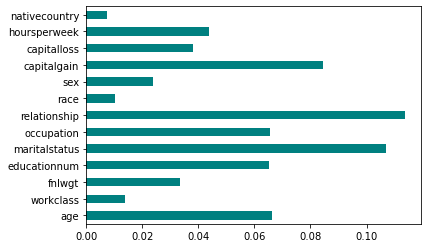

In [12]:
# Checking best features for our label
importances = mutual_info_classif(X,y)
feat_import = pd.Series(importances, feature.columns[0:-1])
feat_import.plot(kind='barh', color ='teal')
plt.show()

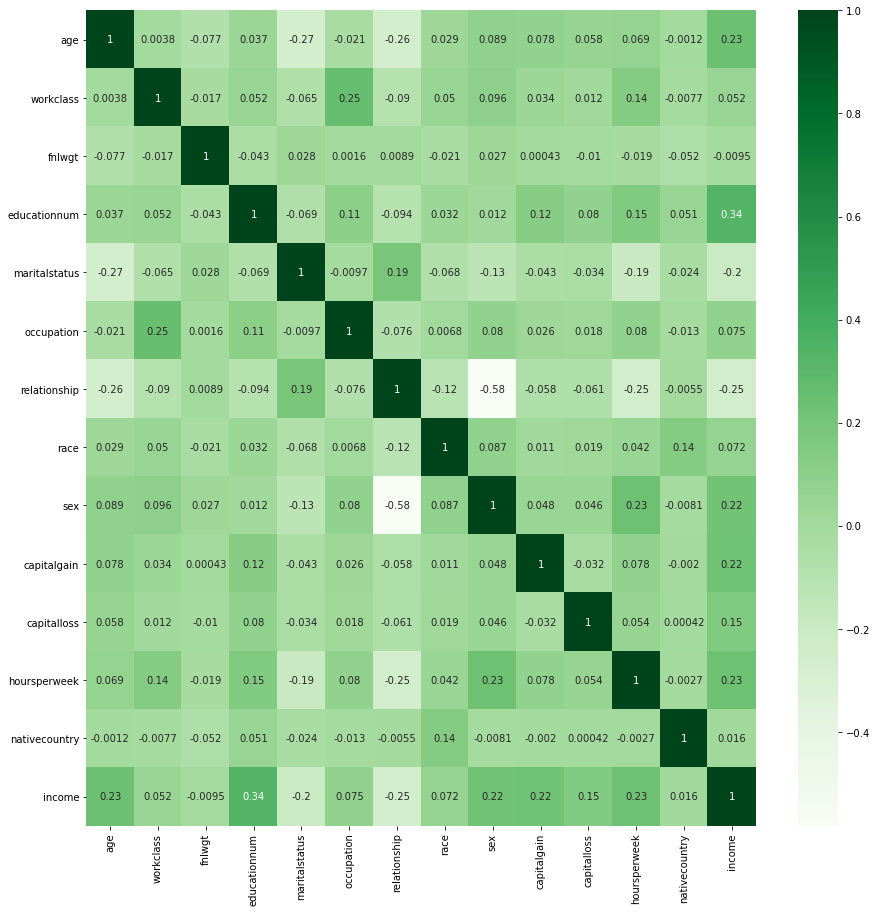

In [13]:
#Correlation between features, to find similar or completely opposite related attributes
plt.figure(figsize=(15,15))
d = sns.heatmap(feature.corr(),cmap="Greens",annot= True)

**From mutual_info_classif model, we came to know that 'nativecountry','race','workclass' have least impact on output, therefore we are removing those attributes as a part of feature selection/pruning. Native country and workclass had missing values, so we don't have to deal with missing values for these two.**

**We can see from correlation that no attributes have similarity (>50 %) in relation to occupation. Since it won't make sense to impute 'Occupation' using mean mode and median. Therefore, we are removing the missing values**

In [14]:
#Removing missing values 
feature_data=train_data[~train_data.occupation.str.contains(r'[?]')]
#feature_data=train_data[~train_data.workclass.str.contains(r'[?]')]
#feature_data=train_data[~train_data.nativecountry.str.contains(r'[?]')]

In [15]:
feature_data.shape

(30718, 14)

In [16]:
#Encoding again after removing missing values
feature_data = feature_data.drop(['nativecountry','race','workclass'], axis =1)
feature_data['maritalstatus'] = feature_data[['maritalstatus']].apply(labels.fit_transform)
feature_data['occupation'] = feature_data[['occupation']].apply(labels.fit_transform)
feature_data['relationship'] = feature_data[['relationship']].apply(labels.fit_transform)
feature_data['sex'] = feature_data[['sex']].apply(labels.fit_transform)
feature_data['income'] = feature_data[['income']].apply(labels.fit_transform)

In [17]:
feature_data.shape

(30718, 11)

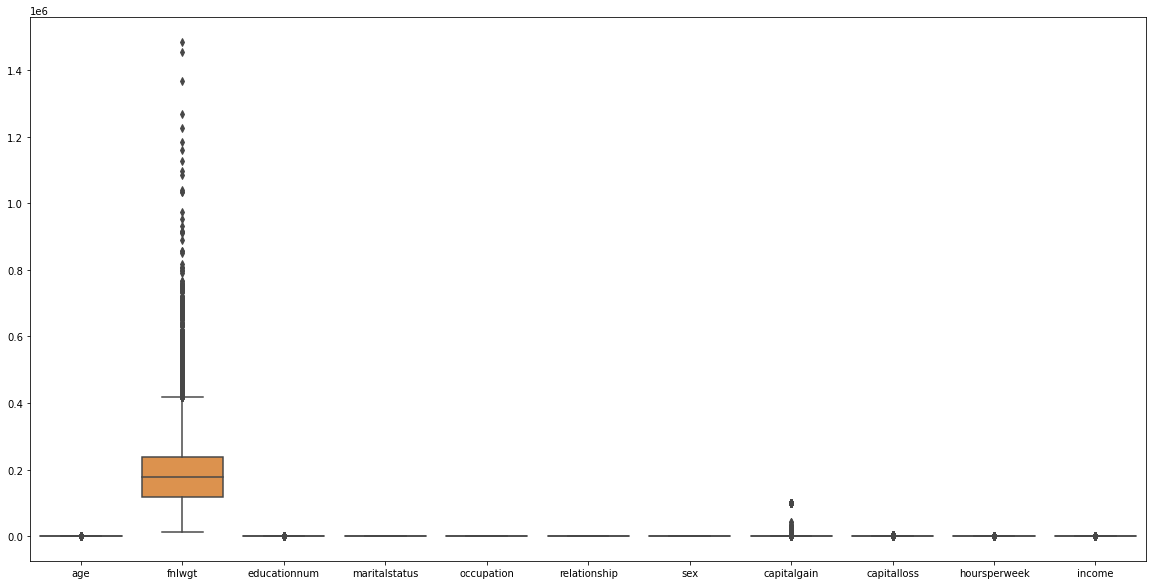

In [18]:
# Box plot for outlier detection
plt.figure(figsize=(20,10))
sns.boxplot(data=feature_data)
plt.show()

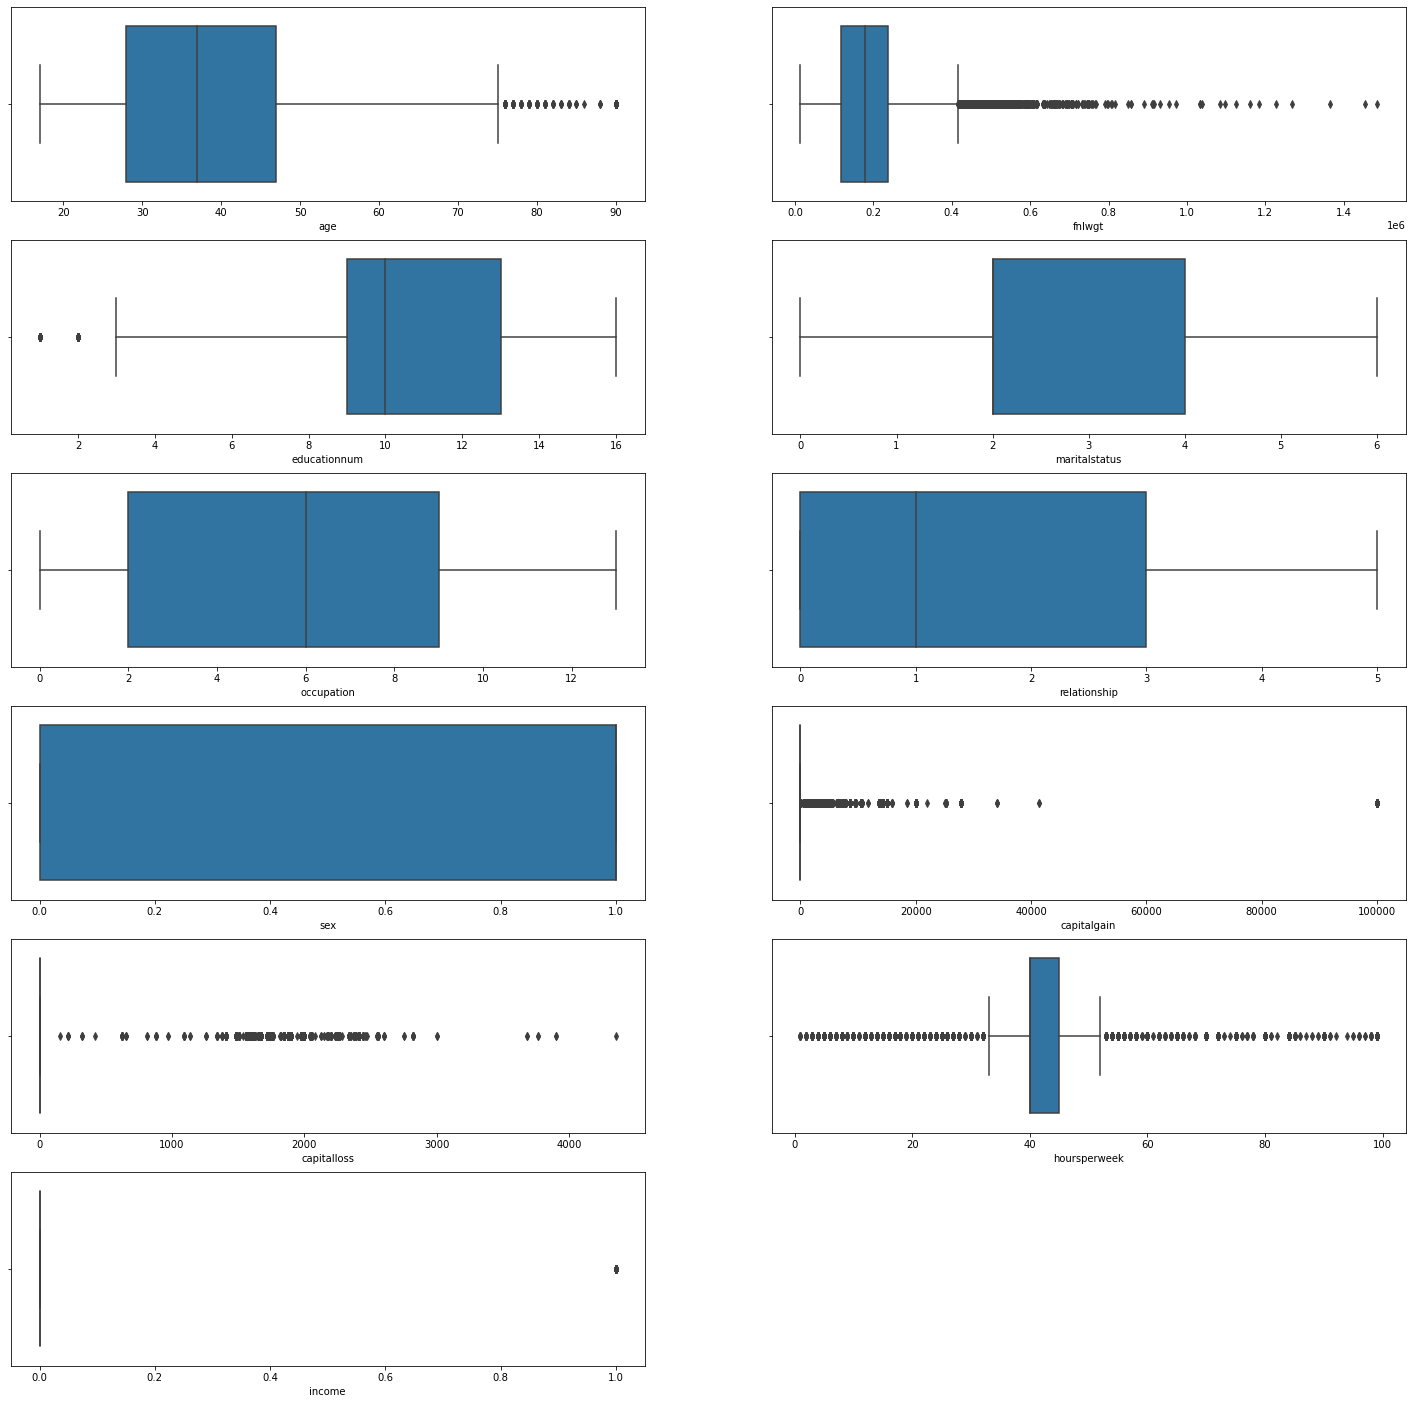

In [21]:
# Lets see the IQR
plt.figure(figsize = (25,25))
features = ['age', 'fnlwgt', 'educationnum', 'maritalstatus', 'occupation','relationship', 'sex', 'capitalgain', 'capitalloss','hoursperweek','income']
for i in enumerate(features):
    plt.subplot(6,2,i[0]+1)
    sns.boxplot(feature_data[i[1]])

In [22]:
# z score to remove outliers
z = np.abs(stats.zscore(feature_data))
pd.DataFrame(z,columns=feature_data.columns)

,age,fnlwgt,educationnum,maritalstatus,occupation,relationship,sex,capitalgain,capitalloss,hoursperweek,income
0,0.042416,1.065173,1.119909,0.947319,1.482162,0.260556,0.691144,0.142438,0.219179,0.079207,0.575872
1,0.880958,1.010222,1.119909,0.389893,0.736994,0.885020,0.691144,0.147516,0.219179,2.331988,0.575872
2,0.033815,0.244655,0.441111,1.727105,0.240215,0.260556,0.691144,0.147516,0.219179,0.079207,0.575872
3,1.109651,0.425535,1.221621,0.389893,0.240215,0.885020,0.691144,0.147516,0.219179,0.079207,0.575872
4,0.796125,1.408764,1.119909,0.389893,0.753344,2.237300,1.446877,0.147516,0.219179,0.079207,0.575872
...,...,...,...,...,...,...,...,...,...,...,...
30713,0.872356,0.639661,0.729654,0.389893,1.498513,2.237300,1.446877,0.147516,0.219179,0.246080,0.575872
30714,0.118647,0.336362,0.441111,0.389893,0.008175,0.885020,0.691144,0.147516,0.219179,0.079207,1.736498
30715,1.490806,0.359727,0.441111,2.284531,1.482162,1.612836,1.446877,0.147516,0.219179,0.079207,0.575872
30716,1.253512,0.110419,0.441111,0.947319,1.482162,0.988372,0.691144,0.147516,0.219179,1.747934,0.575872


In [23]:
# Z score threshold and checking data after outlier removal
feature_data = feature_data[(z < 3.5).all(axis=1)]
feature_data.shape

(28758, 11)

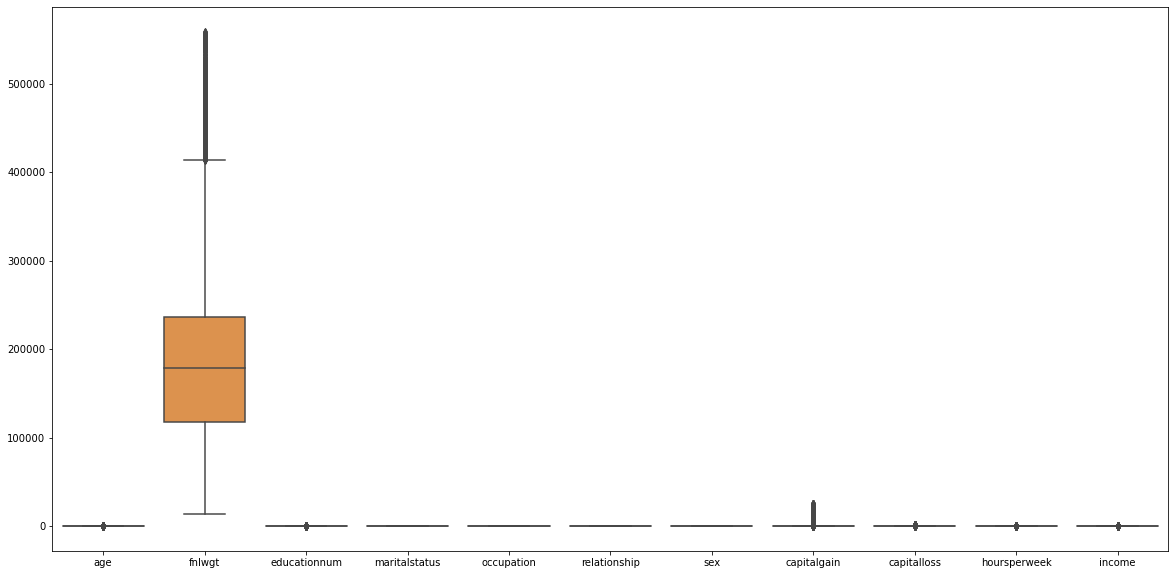

In [24]:
# Box plot
plt.figure(figsize=(20,10))
sns.boxplot(data=feature_data)
plt.show()

In [25]:
#Splitting features and labels 
X = feature_data.drop('income',axis =1)
y_train = feature_data['income']

In [26]:
# Feature pruning for test dataset similar to training dataset
test_data = test_data.drop(['nativecountry','race','workclass','education'], axis =1)

In [27]:
#Encoding test data with same label encoder model used in train dataset
test_feature = test_data.copy()
test_feature['maritalstatus'] = test_feature[['maritalstatus']].apply(labels.fit_transform)
test_feature['occupation'] = test_feature[['occupation']].apply(labels.fit_transform)
test_feature['relationship'] = test_feature[['relationship']].apply(labels.fit_transform)
test_feature['sex'] = test_feature[['sex']].apply(labels.fit_transform)
test_feature['income'] = test_feature[['income']].apply(labels.fit_transform)
y_test = test_feature['income']

In [28]:
test_feature.shape

(16281, 11)

**Data Visualization**

<function matplotlib.pyplot.show(*args, **kw)>

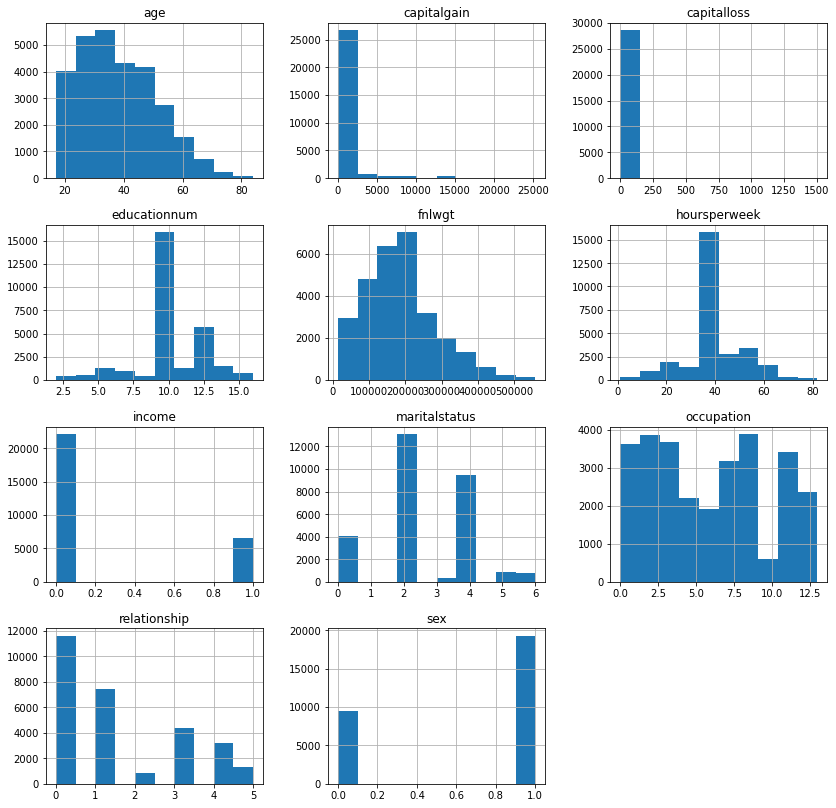

In [29]:
#Visualization of each attributes
feature_data.hist(figsize=(14,14))
plt.show

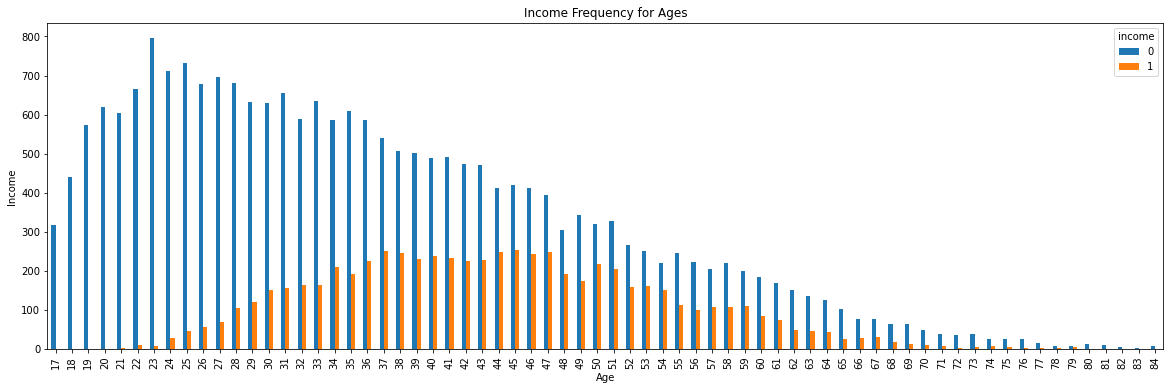

In [30]:
#Relation between age and Income attribute to understand the trends
pd.crosstab(feature_data.age,feature_data.income).plot(kind="bar",figsize=(20,6))
plt.title('Income Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [31]:
# Showing the mean, st. deviation and other parameters of each attribute
X.describe()

,age,fnlwgt,educationnum,maritalstatus,occupation,relationship,sex,capitalgain,capitalloss,hoursperweek
count,28758.000000,28758.000000,28758.000000,28758.000000,28758.000000,28758.000000,28758.000000,28758.000000,28758.000000,28758.000000
mean,38.168266,187000.273350,10.084533,2.596738,5.943876,1.446728,0.669483,593.055567,6.250748,40.446067
std,13.005442,97041.822453,2.508902,1.508220,4.032475,1.603126,0.470407,2420.094300,91.477775,11.211913
min,17.000000,13769.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,28.000000,117705.250000,9.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,40.000000
50%,37.000000,178342.500000,10.000000,2.000000,6.000000,1.000000,1.000000,0.000000,0.000000,40.000000
75%,47.000000,236068.750000,12.000000,4.000000,9.000000,3.000000,1.000000,0.000000,0.000000,45.000000
max,84.000000,558490.000000,16.000000,6.000000,13.000000,5.000000,1.000000,25236.000000,1504.000000,82.000000


C:\Users\jibin\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\jibin\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\jibin\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


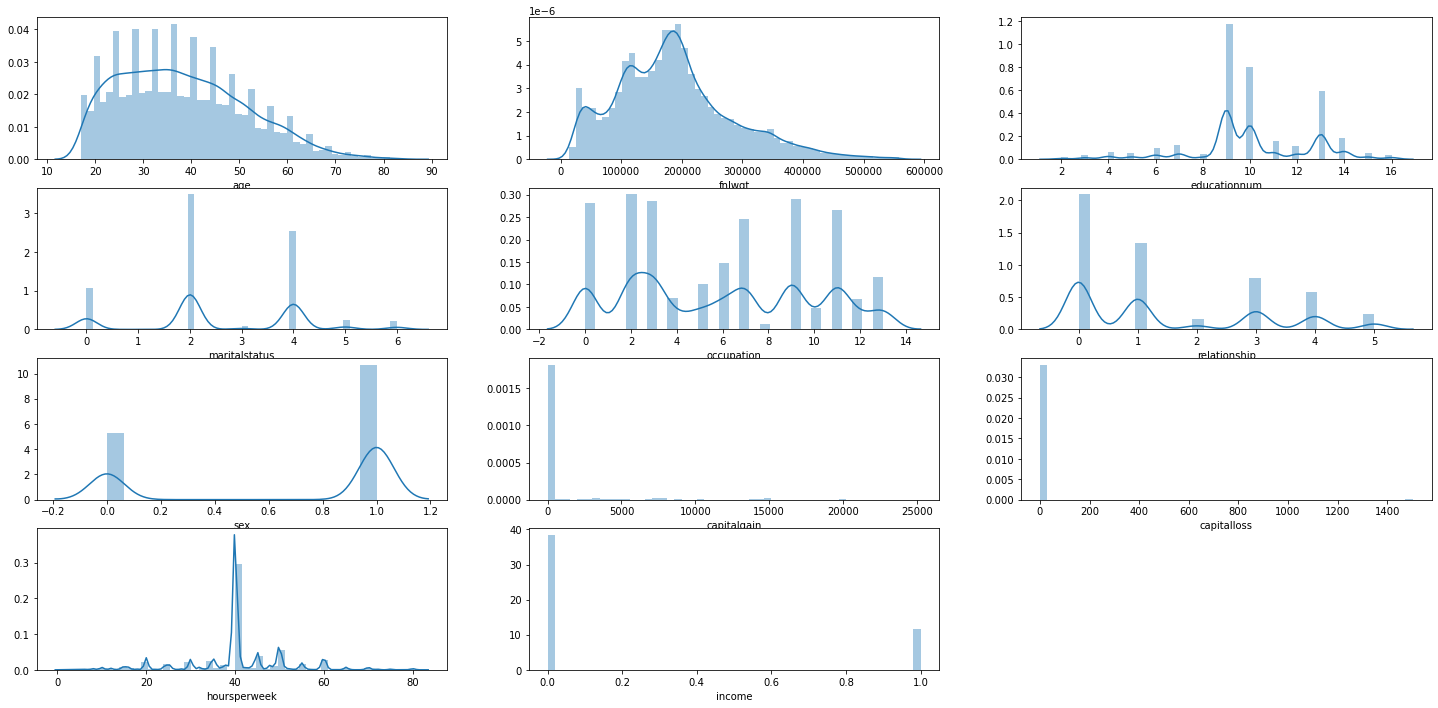

In [52]:
plt.figure(figsize = (25,12))
features = ['age', 'fnlwgt', 'educationnum', 'maritalstatus', 'occupation','relationship', 'sex', 'capitalgain', 'capitalloss','hoursperweek','income']
for i in enumerate(features):
    plt.subplot(4,3,i[0]+1)
    sns.distplot(feature_data[i[1]])

In [32]:
#Scaling down the train dataset for model estimators

from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(feature_data.drop('income',axis=1))
scaled_features1 = standardScaler.transform(feature_data.drop('income',axis=1))
X_train = pd.DataFrame(scaled_features1,columns=feature_data.columns[:-1])

In [33]:
#Scaling down the test dataset for model estimators (same used for train)
scaled_features2 = standardScaler.transform(test_feature.drop('income',axis=1))
X_test = pd.DataFrame(scaled_features2,columns=test_feature.columns[:-1])

In [34]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logicRe=LogisticRegression()
logicRe.fit(X_train,y_train)
pred = logicRe.predict(X_test)
A2 = round(accuracy_score(y_test, pred, normalize = True)*100,2)
print(" Logistic Regression accuracy is",A2)

 Logistic Regression accuracy is 82.16


In [35]:
#Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train, y_train)
pred1 =gnb.predict(X_test)
A2 = round(accuracy_score(y_test, pred1, normalize = True)*100,2)
print("Naive-Bayes accuracy without noise is",A2)

Naive-Bayes accuracy without noise is 81.26


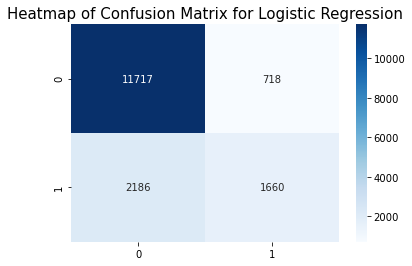

In [36]:
#Confusion Matrix for Logistic
cm = confusion_matrix(y_test, pred)
plt.title('Heatmap of Confusion Matrix for Logistic Regression', fontsize = 15)
#sns.heatmap(cm, annot = True,cmap='Blues')
group_names = ['True Pos','False Pos','False Neg','True Neg']
labels = np.asarray(group_names).reshape(2,2)
sns.heatmap(cm, annot=True , 
            fmt='', cmap='Blues')
plt.show()

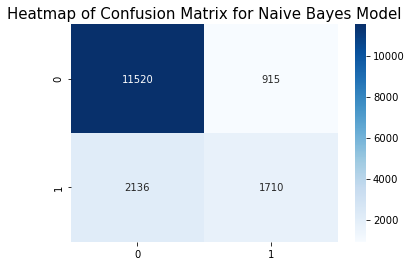

In [37]:
#Confusion Matrix for Naive Bayes
cm = confusion_matrix(y_test, pred1)
plt.title('Heatmap of Confusion Matrix for Naive Bayes Model', fontsize = 15)
#sns.heatmap(cm, annot = True,cmap='Blues')
group_names = ['True Pos','False Pos','False Neg','True Neg']
labels = np.asarray(group_names).reshape(2,2)
sns.heatmap(cm, annot=True, 
            fmt='', cmap='Blues')
plt.show()

In [53]:
#Showing the classification report such as Precision, Recall, F1 score for Logistic
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89     12435
           1       0.70      0.43      0.53      3846

    accuracy                           0.82     16281
   macro avg       0.77      0.69      0.71     16281
weighted avg       0.81      0.82      0.81     16281



In [38]:
#Showing the classification report such as Precision, Recall, F1 score for Naive Bayes
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88     12435
           1       0.65      0.44      0.53      3846

    accuracy                           0.81     16281
   macro avg       0.75      0.69      0.71     16281
weighted avg       0.80      0.81      0.80     16281



## Unsupervised Learning

In [39]:
# Elbow Technique to find the number of clusters
from sklearn.cluster import KMeans

k_range= range(1,10)
wcss=[]
for k in k_range:
  km= KMeans(n_clusters=k)
  km.fit(feature_data)
  wcss.append(km.inertia_)
wcss

[270976660367675.25,
 102513264979968.77,
 46436209059255.44,
 29385451451292.84,
 19369825859116.5,
 12983077794895.672,
 9687836760301.475,
 7516434352810.802,
 5997720005762.32]

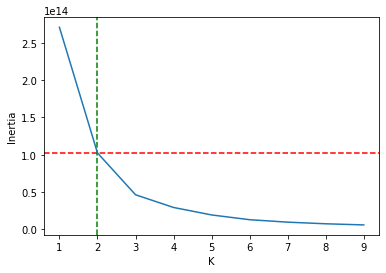

In [40]:
#Plotting to find clusters
plt.xlabel("K")
plt.ylabel('Inertia')
plt.axhline(y=102513264979968.77, color='r', linestyle='--')
plt.axvline(x=2, color='g', linestyle='--')
plt.plot(k_range,wcss)

In [41]:
#Calling the K means model with 2 clusters
km= KMeans(n_clusters=2)
km.fit(feature_data)
km.labels_

array([0, 0, 0, ..., 0, 0, 1])

In [42]:
#Storing the cluster information as 'Cluster' attribute in data
knn_data = feature_data.copy()
knn_data['Cluster'] = km.labels_

#scaled_data_KMeans1=knn_data[knn_data.Cluster==0]
#scaled_data_KMeans2=knn_data[knn_data.Cluster==1]

In [43]:
#plt.scatter(scaled_data_KMeans1['age'],scaled_data_KMeans1['hoursperweek'],color='teal',label='')
#plt.scatter(scaled_data_KMeans2['age'],scaled_data_KMeans2['hoursperweek'],color='orange',label='')

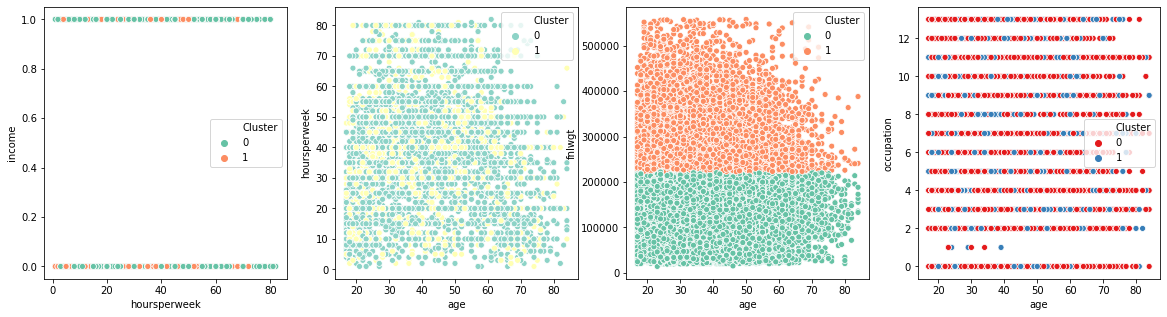

In [50]:
# Scatter-plot:

f, axes = plt.subplots(1, 4, figsize=(20,5))
sns.scatterplot(x='hoursperweek', y='income', hue='Cluster', data=knn_data, palette='Set2',ax=axes[0]);
sns.scatterplot(x='age', y='hoursperweek', hue='Cluster', data=knn_data, palette='Set3',ax=axes[1]);
sns.scatterplot(x='age', y='fnlwgt', hue='Cluster', data=knn_data, palette='Set2',ax=axes[2]);
sns.scatterplot(x='age', y='occupation', hue='Cluster', data=knn_data, palette='Set1',ax=axes[3]);

**Since we have output label available, lets check the accuracy of our model**

In [45]:
#Accuracy of training data
A3 = round(accuracy_score(y_train ,knn_data['Cluster'], normalize = True)*100,2)
print("K means accuracy score with training data is",A3)

K means accuracy score with training data is 60.48


In [46]:
#Predicting the cluster for test data
unsup_pred = km.predict(test_feature)

In [47]:
# Accuracy for test dataset
A4 = round(accuracy_score(y_test,unsup_pred, normalize = True)*100,2)
print("K means accuracy score with test data is",A4)

K means accuracy score with test data is 60.52


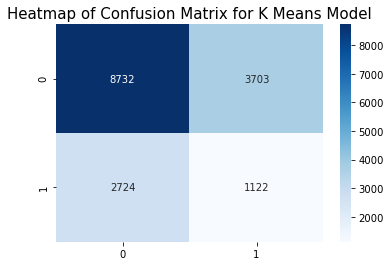

In [48]:
#Confusion Matrix for test dataset
cm = confusion_matrix(y_test, unsup_pred)
plt.title('Heatmap of Confusion Matrix for K Means Model', fontsize = 15)
#sns.heatmap(cm, annot = True,cmap='Blues')
#group_names = ['True Pos','False Pos','False Neg','True Neg']
#labels = np.asarray(group_names).reshape(2,2)
sns.heatmap(cm,annot=True, fmt='', cmap='Blues')
plt.show()

In [54]:
#Showing the classification report such as Precision, Recall, F1 score for Naive Bayes
print(classification_report(y_test,unsup_pred))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73     12435
           1       0.23      0.29      0.26      3846

    accuracy                           0.61     16281
   macro avg       0.50      0.50      0.49     16281
weighted avg       0.64      0.61      0.62     16281

